<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-classic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Time Series data: Classic Machine Learning

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html



In [0]:
import pandas as pd
import numpy as np

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

In [0]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

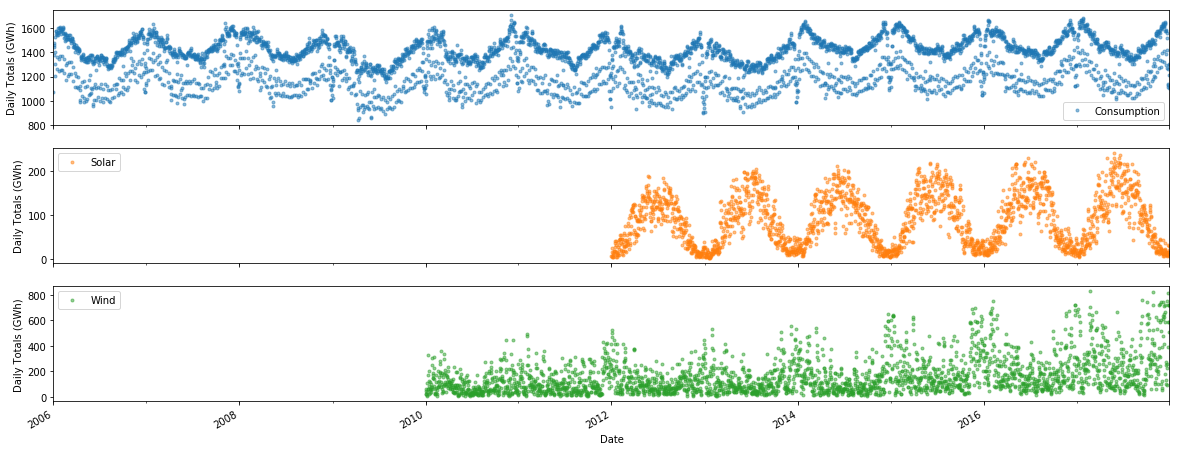

In [4]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

## Classic Models

In [0]:
y = time_series_df['2016-12': '2017-2']['Consumption'].to_numpy()

In [6]:
y.shape

(90,)

In [0]:
X = np.arange(len(y)).reshape(-1, 1)

In [8]:
X.shape

(90, 1)

In [9]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor(tol=None, max_iter=10000)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [10]:
est.score(X, y)

-2.4011783610773567

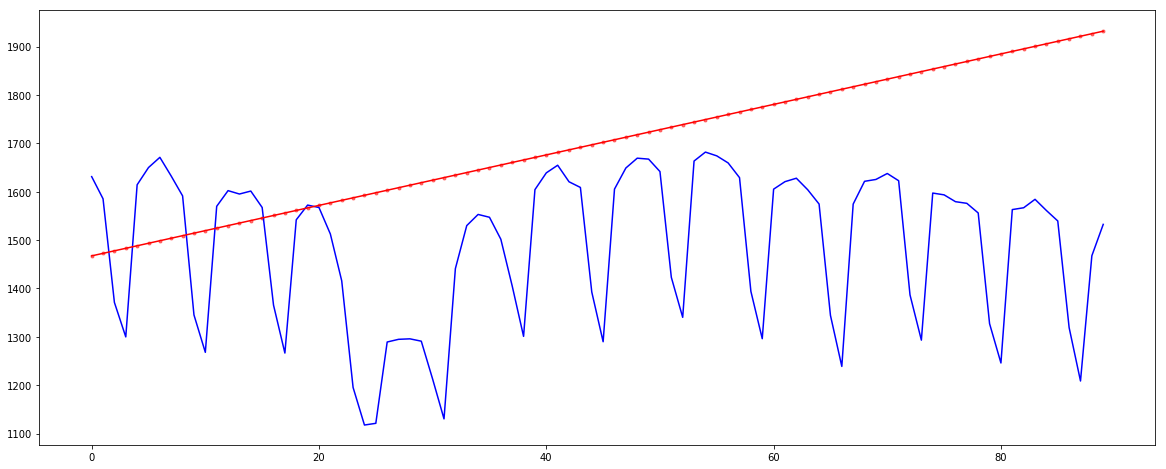

In [11]:
plt.plot(X, y, color='blue')

# we can either plot using line parameters 
a = est.coef_; b = est.intercept_
lreg = a*X + b
plt.plot(X, lreg, c='red')

# or plot predicted points
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red');

In [0]:
from sklearn.svm import SVR

In [13]:
%%time

svr_lin = SVR(kernel='linear', C=1e4)
y_lin = svr_lin.fit(X, y).predict(X)

CPU times: user 1.58 s, sys: 898 µs, total: 1.59 s
Wall time: 1.6 s


In [14]:
svr_lin.score(X, y)

-0.236278875385578

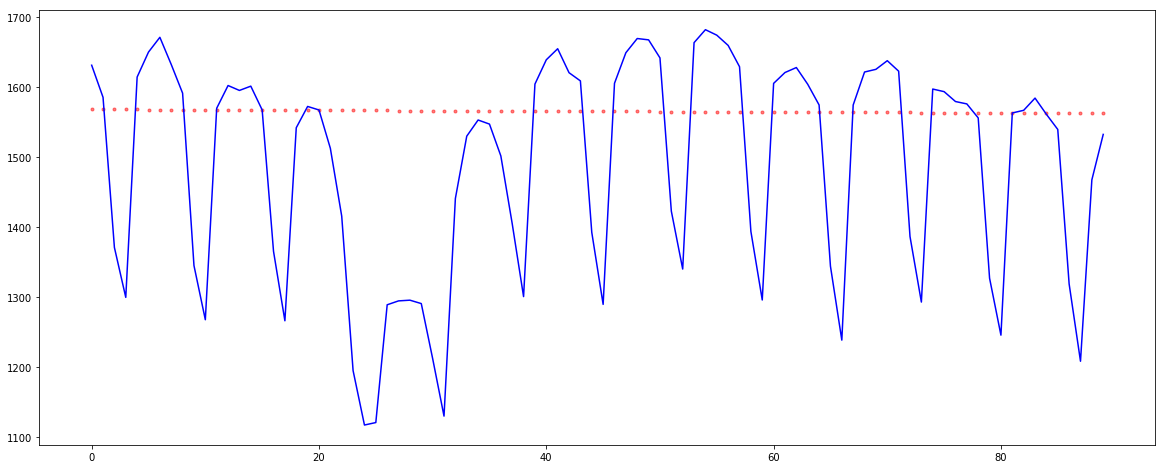

In [15]:
plt.plot(X, y, color='blue')
plt.scatter(X, y_lin, marker='.', alpha=0.5, color='red')

In [29]:
%%time

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

CPU times: user 23.8 ms, sys: 1.46 ms, total: 25.3 ms
Wall time: 25.1 ms


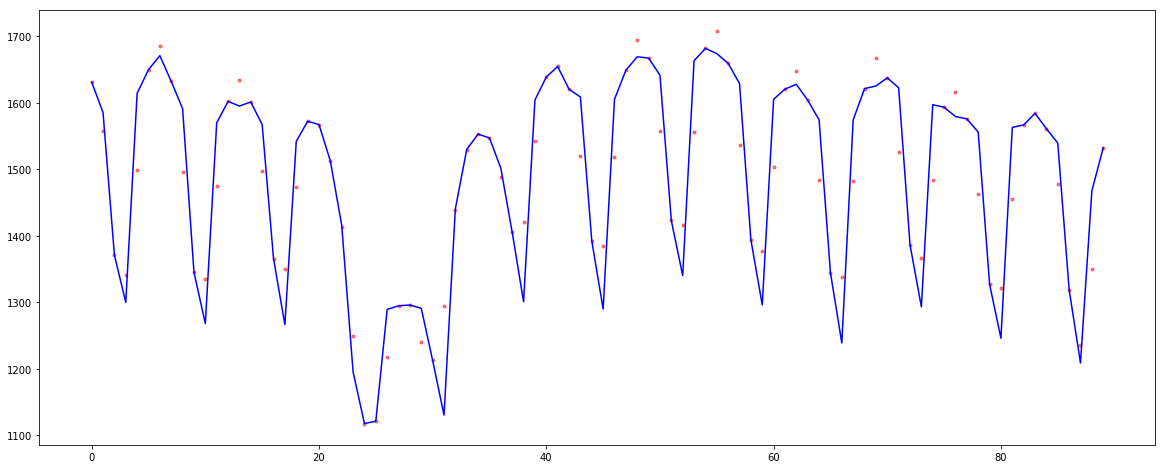

In [30]:
plt.plot(X, y, color='blue')
plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

In [31]:
svr_rbf.score(X, y)

0.8688596891435212

In [32]:
%%time

# regularize a bit
# svr_rbf = SVR(kernel='rbf', C=50, gamma=0.1)
# y_rbf = svr_rbf.fit(X, y).predict(X)
# plt.plot(X, y, color='blue')
# plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


CPU times: user 2.51 s, sys: 4.04 ms, total: 2.51 s
Wall time: 2.52 s


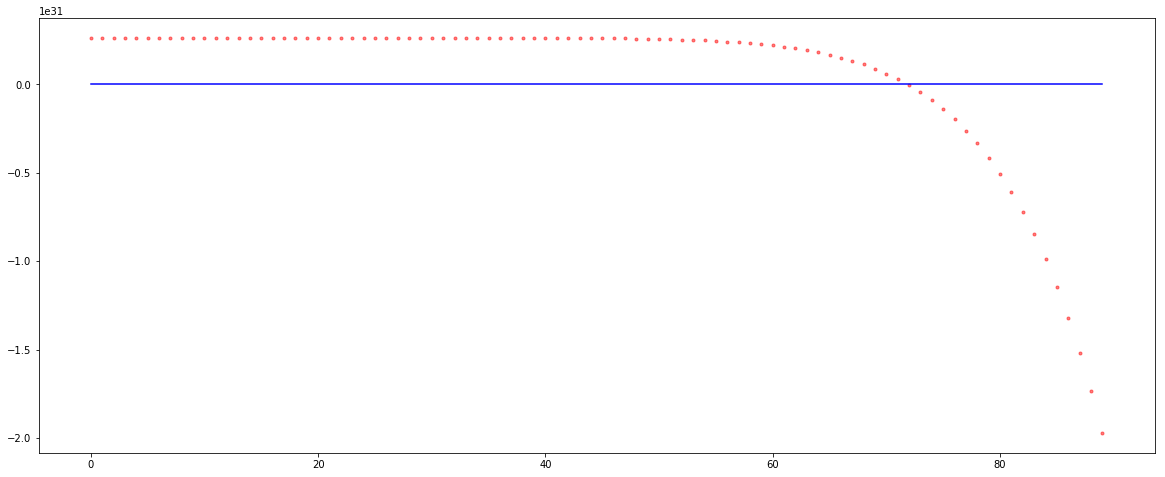

In [33]:
%%time 

svr_poly = SVR(kernel='poly', max_iter=1000000, degree=10)
y_poly = svr_poly.fit(X, y).predict(X)
plt.plot(X, y, color='blue')
plt.scatter(X, y_poly, marker='.', alpha=0.5, color='red')

### Evaluation

In [34]:
y_test = time_series_df['2017-2': '2017-3']['Consumption'].to_numpy()
y_test.shape

(59,)

In [35]:
X_test = np.arange(len(y), len(y) + len(y_test)).reshape(-1, 1)
X_test.shape

(59, 1)

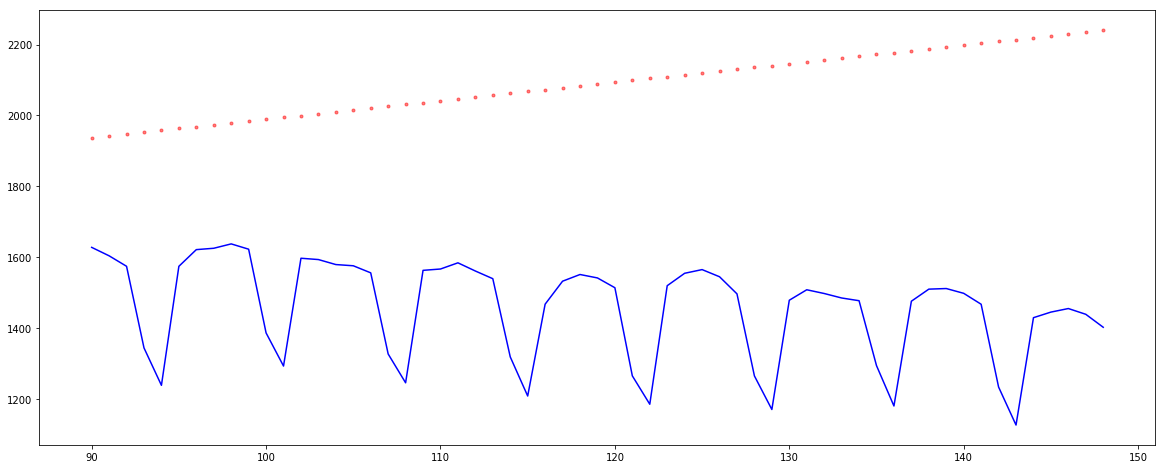

In [36]:
plt.plot(X_test, y_test, color='blue')

y_test_pred = est.predict(X_test)
plt.scatter(X_test, y_test_pred, marker='.', alpha=0.5, color='red')

In [37]:
est.score(X_test, y_test)

-21.534896530471975

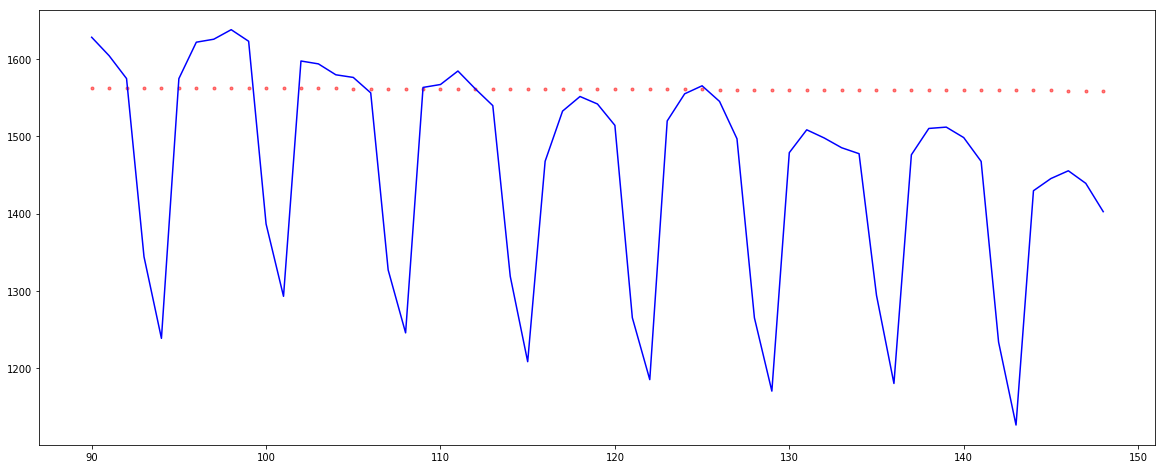

In [38]:
plt.plot(X_test, y_test, color='blue')

y_lin = svr_lin.predict(X_test)

plt.scatter(X_test, y_lin, marker='.', alpha=0.5, color='red')

In [39]:
svr_lin.score(X_test, y_test)

-0.5385690425898566

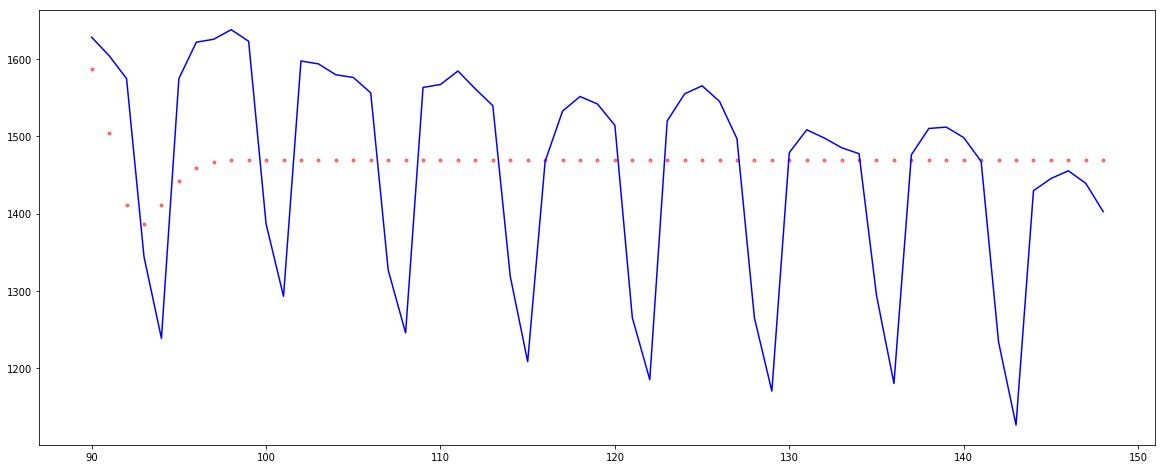

In [40]:
plt.plot(X_test, y_test, color='blue')

y_rbf = svr_rbf.predict(X_test)

plt.scatter(X_test, y_rbf, marker='.', alpha=0.5, color='red')

In [41]:
svr_rbf.score(X_test, y_test)

0.03204329980888687